In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


<a name='top'></a>

## **Table of Contents**
- [Importing Necessary Libraries](#import-important-libraries)
- [Data Loading](#data-loading)
- [Exploratory Data Anlysis(EDA)](#eda)
- [Data Visualization](#data-visualization)
- [Handling Null Values](#null-values-treatment)
- [Splitting the DataSet](#train-test-split)
- [Feature Engineering](#feature-engineering)
- [Data Preprocessing](#preprocessing)
- [Model Training](#model-training)

### Importing Necessary Libraries
<a name='import-important-libraries'></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from wordcloud import WordCloud
from scipy.stats import zscore
from scipy.stats import chi2_contingency
import folium
from folium.plugins import HeatMap
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,LabelEncoder,MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2,f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier

## Data Loading
<a name='data-loading'></a>

In [3]:

df_train=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
df_test=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")
submission=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv")

## Exploratory Data Analysis (EDA)
<a name='eda'></a>

### Shape

In [4]:
print("Shape of training data",df_train.shape)
print("Shape of test data",df_test.shape)

Shape of training data (20000, 22)
Shape of test data (5000, 21)


### Head

In [5]:
df_train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


### Checking Datatypes using `info`

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

#### Insights
- String Columns (Object Type)
  - `Location`
  - `Cross_Street`
  - `Date_Reported`, `Date_Occurred`
  - `Area_Name`
  - `Modus_Operandi`
  - `Victim_Sex`, `Victim_Descent`
  - `Premise_Description`
  - `Weapon_Description`
  - `Status`, `Status_Description`
  - `Crime_Category`

- Numerical Columns (Float64 Type)
  - `Latitude`, `Longitude`
  - `Time_Occurred`
  - `Area_ID`, `Reporting_District_no`, `Part 1-2`, `Victim_Age`, `Premise_Code` 
  - `Weapon_Used_Code`
  
- Most columns (e.g., `Location`, `Date_Reported`, `Latitude`) have no missing values.
- Significant missing values in columns like `Cross_Street`, `Weapon_Used_Code`, and `Weapon_Description`.
- Many object-type columns `Modus_Operandi`,`Victim_Sex`,`Victim_Descent`  ,`Premise_Description`have missing values.  
  

### Summary Statistics of train and test using `describe`

In [7]:
df_train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


#### Insights


`Victim_Age` column The age of victims ranges from a minimum of -2 to a maximum of 99. The presence of a negative value suggests data quality issues or possible errors.

* **Range**: Ages span from -2 to 99. 
* **Mean**: Average age is 30.1 years.
* **Median**: Middle age is 31 years.
* **Standard Deviation**: 21.9 years, indicating a wide age range.

The `Victim_Age` column shows a wide range of ages with a mean of about 30 years.
The median age is close to the mean, suggesting a roughly symmetric distribution, but the standard deviation indicates that there is a substantial spread in ages.

In [8]:
df_test.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,1847.000000
mean,33.957169,-117.952663,1337.737400,10.736600,1119.879800,1.414000,30.592000,300.858800,364.014077
std,1.986742,6.890957,663.922202,6.051524,605.143645,0.492598,21.897905,212.253742,119.489932
min,0.000000,-118.650300,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.010800,-118.431200,900.000000,6.000000,628.000000,1.000000,14.000000,101.000000,309.000000
50%,34.058000,-118.323200,1430.000000,11.000000,1138.000000,1.000000,31.000000,203.000000,400.000000
75%,34.162250,-118.274600,1900.000000,16.000000,1622.250000,2.000000,46.000000,501.000000,400.000000
max,34.327500,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,957.000000,516.000000


#### Insights

`Victim_Age` Column in test
* **Range**: -2 to 99 years (negative values may indicate errors).
* **Mean**: 30.6 years
* **Median**: 31 years
* **Standard Deviation**: 21.9 years (indicating wide variability)

Since the Mean ,Median ,Standard Deviation of test data has same values as for train data ,it means the test data has similar distribution as train.

### Checking the percentage of Null values in dataset using `isna`

In [9]:
df_train.isna().sum()/len(df_train)*100

Location                  0.000
Cross_Street             82.760
Latitude                  0.000
Longitude                 0.000
Date_Reported             0.000
Date_Occurred             0.000
Time_Occurred             0.000
Area_ID                   0.000
Area_Name                 0.000
Reporting_District_no     0.000
Part 1-2                  0.000
Modus_Operandi           13.705
Victim_Age                0.000
Victim_Sex               13.120
Victim_Descent           13.120
Premise_Code              0.000
Premise_Description       0.025
Weapon_Used_Code         63.325
Weapon_Description       63.325
Status                    0.000
Status_Description        0.000
Crime_Category            0.000
dtype: float64

In [10]:
df_test.isna().sum()/len(df_test)*100

Location                  0.00
Cross_Street             83.80
Latitude                  0.00
Longitude                 0.00
Date_Reported             0.00
Date_Occurred             0.00
Time_Occurred             0.00
Area_ID                   0.00
Area_Name                 0.00
Reporting_District_no     0.00
Part 1-2                  0.00
Modus_Operandi           13.68
Victim_Age                0.00
Victim_Sex               12.86
Victim_Descent           12.86
Premise_Code              0.00
Premise_Description       0.02
Weapon_Used_Code         63.06
Weapon_Description       63.06
Status                    0.00
Status_Description        0.00
dtype: float64

#### Insights
Checking the percentages of the null values in the columns of the dataset is an important step in understanding weather the column needs to be droped or imputed.
* `Cross_Street`: 82.76% missing 
* `Weapon_Used_Code`: 63.33% missing 
* `Weapon_Description`: 63.33% missing,
high percentage of missing values in both training and test data, indicates significant data gaps which means these columns can be dropped.
* `Modus_Operandi`: 13.71% missing
* `Victim_Sex`: 13.12% missing
* `Victim_Descent`: 13.12% missing
* `Premise_Description`: 0.025% missing
have moderate missing percentages.So these columns can be imputed

## Data Visualization
<a name='data-visualization'></a>

### Understanding the distribution of Target Label(`Crime_Category`)

In [11]:
print("Number of Unique Classes in Target Label:",df_train['Crime_Category'].nunique())
print("List of the unique Classes in Target Label:",df_train['Crime_Category'].unique())

Number of Unique Classes in Target Label: 6
List of the unique Classes in Target Label: ['Property Crimes' 'Violent Crimes' 'Other Crimes'
 'Crimes against Public Order' 'Fraud and White-Collar Crimes'
 'Crimes against Persons']


In [12]:
df_train['Crime_Category'].value_counts()/len(df_train)*100

Crime_Category
Property Crimes                  58.330
Violent Crimes                   23.835
Crimes against Public Order       9.040
Fraud and White-Collar Crimes     6.775
Crimes against Persons            1.125
Other Crimes                      0.895
Name: count, dtype: float64

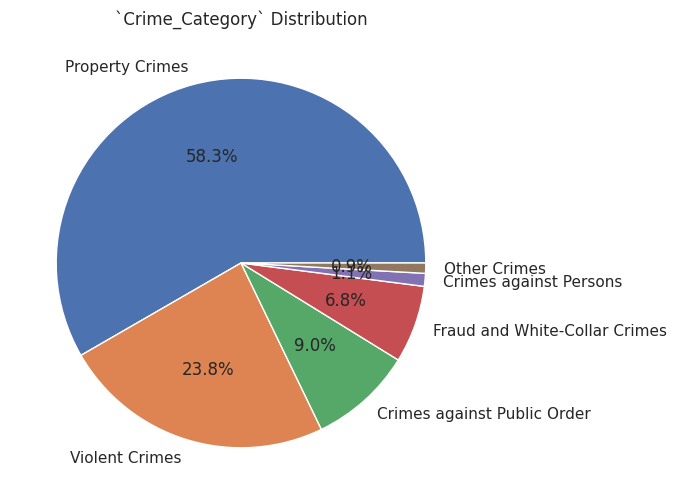

In [13]:
train_crime_cat=[k for k in dict(df_train['Crime_Category'].value_counts().items()).keys()]
train_crime_count=[i for i in dict(df_train['Crime_Category'].value_counts().items()).values()]

sns.set(style='darkgrid')

plt.figure(figsize=(6,6))
plt.pie(train_crime_count,
        labels=train_crime_cat,
        autopct='%1.1f%%'
       )
plt.title('`Crime_Category` Distribution')
plt.show()

#### Insights

* Property Crimes: 58.33% (dominates the dataset)
* Violent Crimes: 23.84% (second most common)
* Crimes against Public Order: 9.04%
* Fraud and White-Collar Crimes: 6.78%
* Crimes against Persons: 1.13% (very small proportion)
* Other Crimes: 0.90% (least frequent)

The dataset is heavily imbalanced with 
* `Property Crimes` being the most frequent category, comprising over half of the entries.
* `Crimes against Persons` and `Other Crimes` are significantly underrepresented. 
This imbalance may impact analytical and modeling outcomes.potentially requiring methods like resampling or reweighting to ensure a fair analysis.


### Label Encoder

In [14]:
label_enc=LabelEncoder()
df_train['Crime_Category']=label_enc.fit_transform(df_train['Crime_Category'])

### Correlation of target feature`Crime_Category` with other features

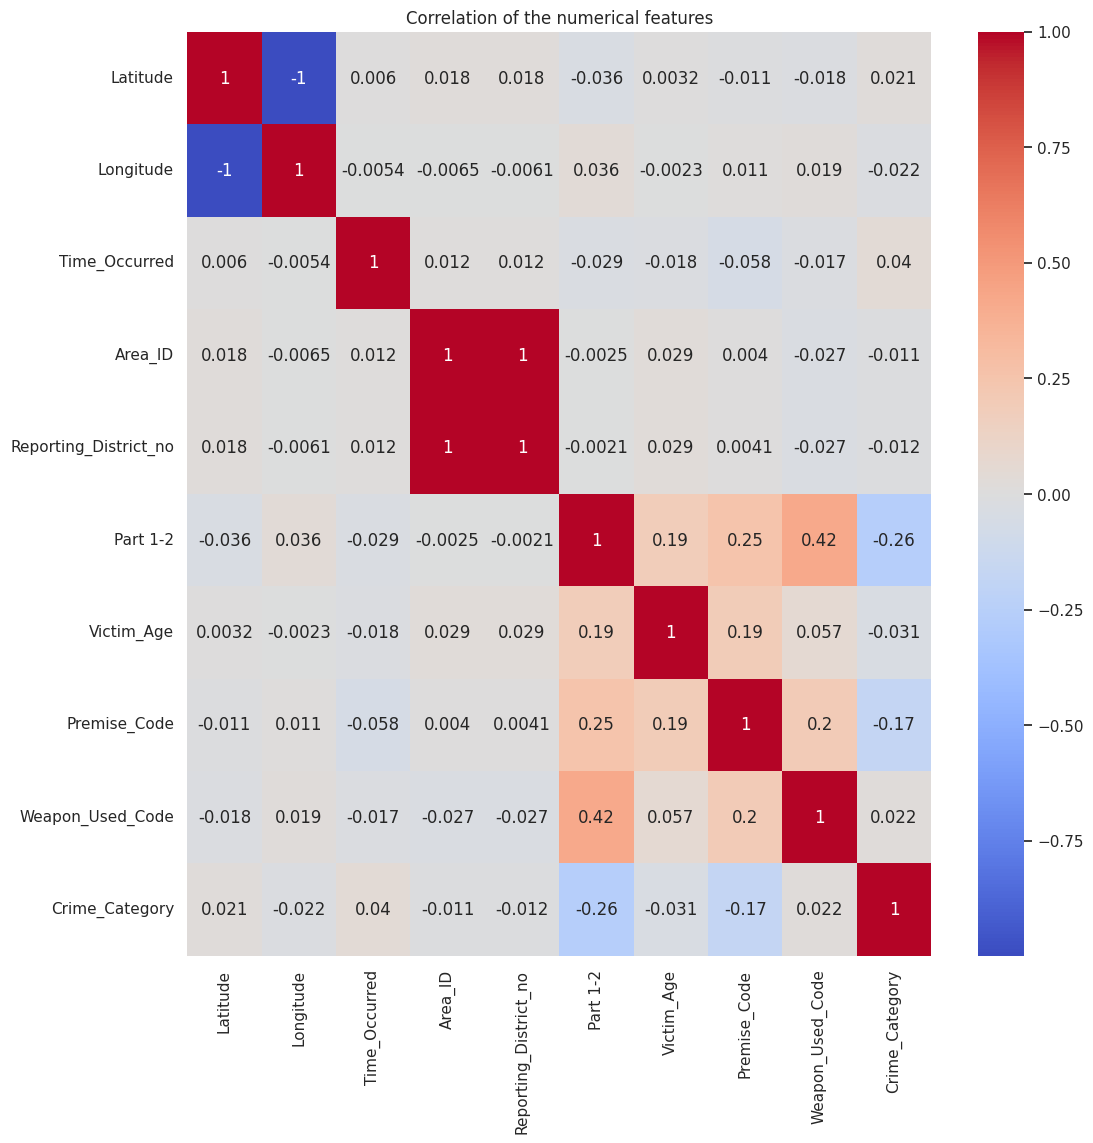

In [15]:
corr1=df_train.corr(numeric_only=True)
plt.figure(figsize=(12,12))
sns.heatmap(corr1,annot=True,cmap='coolwarm')
plt.title('Correlation of the numerical features')
plt.show()

#### Insights

`Latitude` and `Longitude`:

Very weak correlations (Latitude: 0.021, Longitude: -0.022), indicating minimal impact on `Crime_Category`.

`Time_Occurred`:

Weak positive correlation (0.040), suggesting a slight but negligible influence on `Crime_Category`.

`Area_ID` and `Reporting_District_no`:

Very weak correlations (Area_ID: -0.011, Reporting_District_no: -0.012), indicating little to no influence on `Crime_Category`.

`Part 1-2`:

Moderate negative correlation (-0.258), suggesting some relationship with `Crime_Category`.

`Victim_Age`:

Weak negative correlation (-0.031), indicating minimal impact on `Crime_Category`.
Premise_Code:

Moderate negative correlation (-0.174), indicating some influence on `Crime_Category`.

`Weapon_Used_Code`:

Weak positive correlation (0.022), indicating minimal impact on `Crime_Category`.

* Most variables have weak correlations with `Crime_Category`, suggesting minimal direct impact.
* `Part 1-2` and `Premise_Code` show moderate correlations, indicating some influence on crime categorization.

## Univariate Analysis of features

#### `Location` feature

In [16]:
df_train['Location'].nunique()

12399

In [17]:
df_train['Location'].unique

<bound method Series.unique of 0         4500    CARPENTER                    AV
1                 45TH                         ST
2          600 E  MARTIN LUTHER KING JR        BL
3        14900    ORO GRANDE                   ST
4         7100 S  VERMONT                      AV
                           ...                   
19995     5100 W  ADAMS                        BL
19996    16900    ROSCOE                       BL
19997     1000 S  SHENANDOAH                   ST
19998      300 W  SEPULVEDA                    ST
19999             DALTON                       AV
Name: Location, Length: 20000, dtype: object>

In [18]:
def clean_location(x):
    #removing the spaces
    x=re.sub(" +"," ",x)
    #removing the numbers and special characters
    x=re.sub("[^A-Za-z]","",x)
    return x
df_train['Location']=df_train['Location'].apply(clean_location)
df_test['Location']=df_test['Location'].apply(clean_location)

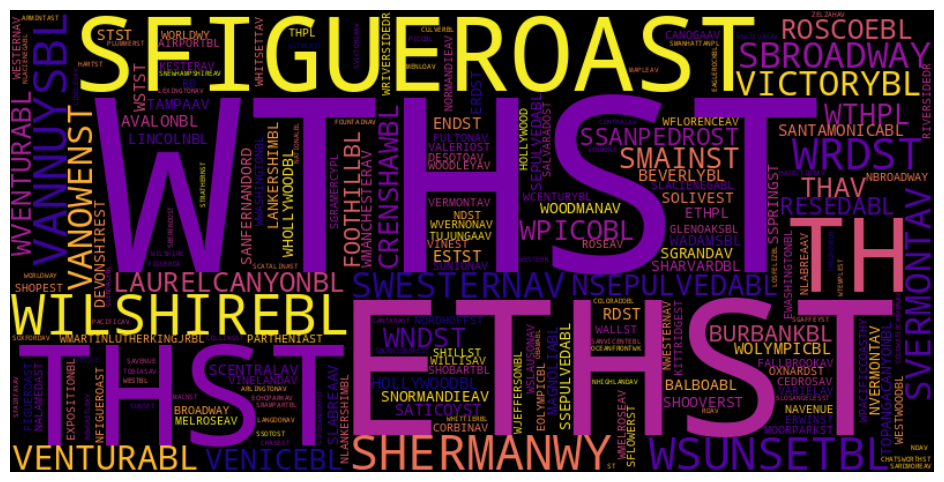

In [19]:
loc=list(df_train['Location'])  #converting into list of words
combine_text=" ".join(loc)     #seprating words by spaces using python join
wordcloud =WordCloud(width=800,
    height=400,
    background_color='black',  
    colormap='plasma',         
    max_words=200,            
    contour_color='white',     
    contour_width=2 ).generate(combine_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#### `Lattitude` and `Longitude` features

In [20]:
lat_long=df_train.loc[:,["Latitude","Longitude"]]
lat_long.describe()

,Latitude,Longitude
count,20000.000000,20000.000000
mean,33.940704,-117.893072
std,2.126810,7.377726
min,0.000000,-118.663400
25%,34.009200,-118.429700
50%,34.058700,-118.323000
75%,34.165025,-118.274400
max,34.328100,0.000000


#### Insight

* The minimum latitude (0.00) and the maximum longitude (0.00) are likely erroneous and needs to be handled.
* Despite these outliers, the overall standard deviations (2.13 for latitude and 7.38 for longitude) suggest that the bulk of the data is within a consistent geographic range.
* The latitude values (around 34 degrees) and longitude values (around -118 degrees) suggest the locations are likely in or around the Los Angeles area in California, USA. This assumption is based on the typical geographic coordinates for that region.

#### `Date_Reported`,`Date_Occurred`,`Time_Occurred` features

In [21]:
ddt=df_train.loc[:,["Date_Reported","Date_Occurred","Time_Occurred"]]


In [22]:
warnings.filterwarnings('ignore')
df_train["Date_Reported"]=pd.to_datetime(df_train["Date_Reported"])
df_train["Date_Occurred"]=pd.to_datetime(df_train["Date_Occurred"])

hour = lambda x: int(x//100)
df_train['Hour_Occurred']=df_train['Time_Occurred'].apply(hour)
df_test['Hour_Occurred']=df_test['Time_Occurred'].apply(hour)

df_train['Year_Reported'] = df_train['Date_Reported'].dt.year
df_train['Month_Reported'] = df_train['Date_Reported'].dt.month
df_train['Day_Reported'] = df_train['Date_Reported'].dt.day

df_train['Year_Occurred'] = df_train['Date_Occurred'].dt.year
df_train['Month_Occurred'] = df_train['Date_Occurred'].dt.month
df_train['Day_Occurred'] = df_train['Date_Occurred'].dt.day


In [23]:
warnings.filterwarnings('ignore')
df_test['Date_Reported'] = pd.to_datetime(df_test['Date_Reported'])
df_test['Date_Occurred'] = pd.to_datetime(df_test['Date_Occurred'])

df_test['Year_Reported'] = df_test['Date_Reported'].dt.year
df_test['Month_Reported'] = df_test['Date_Reported'].dt.month
df_test['Day_Reported'] = df_test['Date_Reported'].dt.day

df_test['Year_Occurred'] = df_test['Date_Occurred'].dt.year
df_test['Month_Occurred'] = df_test['Date_Occurred'].dt.month
df_test['Day_Occurred'] = df_test['Date_Occurred'].dt.day


In [24]:
df_train.drop(columns=['Date_Reported','Date_Occurred','Time_Occurred'],inplace=True)
df_test.drop(columns=['Date_Reported','Date_Occurred','Time_Occurred'],inplace=True)


In [25]:
DateData=['Hour_Occurred','Year_Reported', 'Month_Reported', 'Day_Reported', 'Year_Occurred','Month_Occurred', 'Day_Occurred']
for data in DateData:    
    print(df_train[data].value_counts()/len(df_train)*100)
    

Hour_Occurred
12    7.315
17    6.065
18    5.965
19    5.830
20    5.655
21    5.520
15    5.245
16    5.135
14    5.060
22    4.750
13    4.595
10    4.385
11    4.205
0     4.095
23    4.090
8     3.680
9     3.330
1     2.770
2     2.470
7     2.355
3     2.155
6     2.015
5     1.725
4     1.590
Name: count, dtype: float64
Year_Reported
2020    95.885
2021     2.660
2022     0.880
2023     0.540
2024     0.035
Name: count, dtype: float64
Month_Reported
1     9.120
5     8.770
2     8.630
6     8.625
7     8.450
10    8.405
9     8.315
8     8.170
3     8.125
12    7.935
11    7.745
4     7.710
Name: count, dtype: float64
Day_Reported
28    3.605
4     3.550
21    3.520
16    3.490
17    3.475
5     3.440
18    3.410
24    3.345
23    3.340
10    3.300
22    3.300
6     3.290
1     3.280
25    3.270
13    3.265
11    3.230
26    3.215
14    3.195
30    3.195
9     3.190
2     3.185
20    3.185
3     3.180
8     3.155
7     3.150
27    3.145
12    3.105
29    3.080
15    3.080
19   

### Checking the Correlation of the updated features with target feature

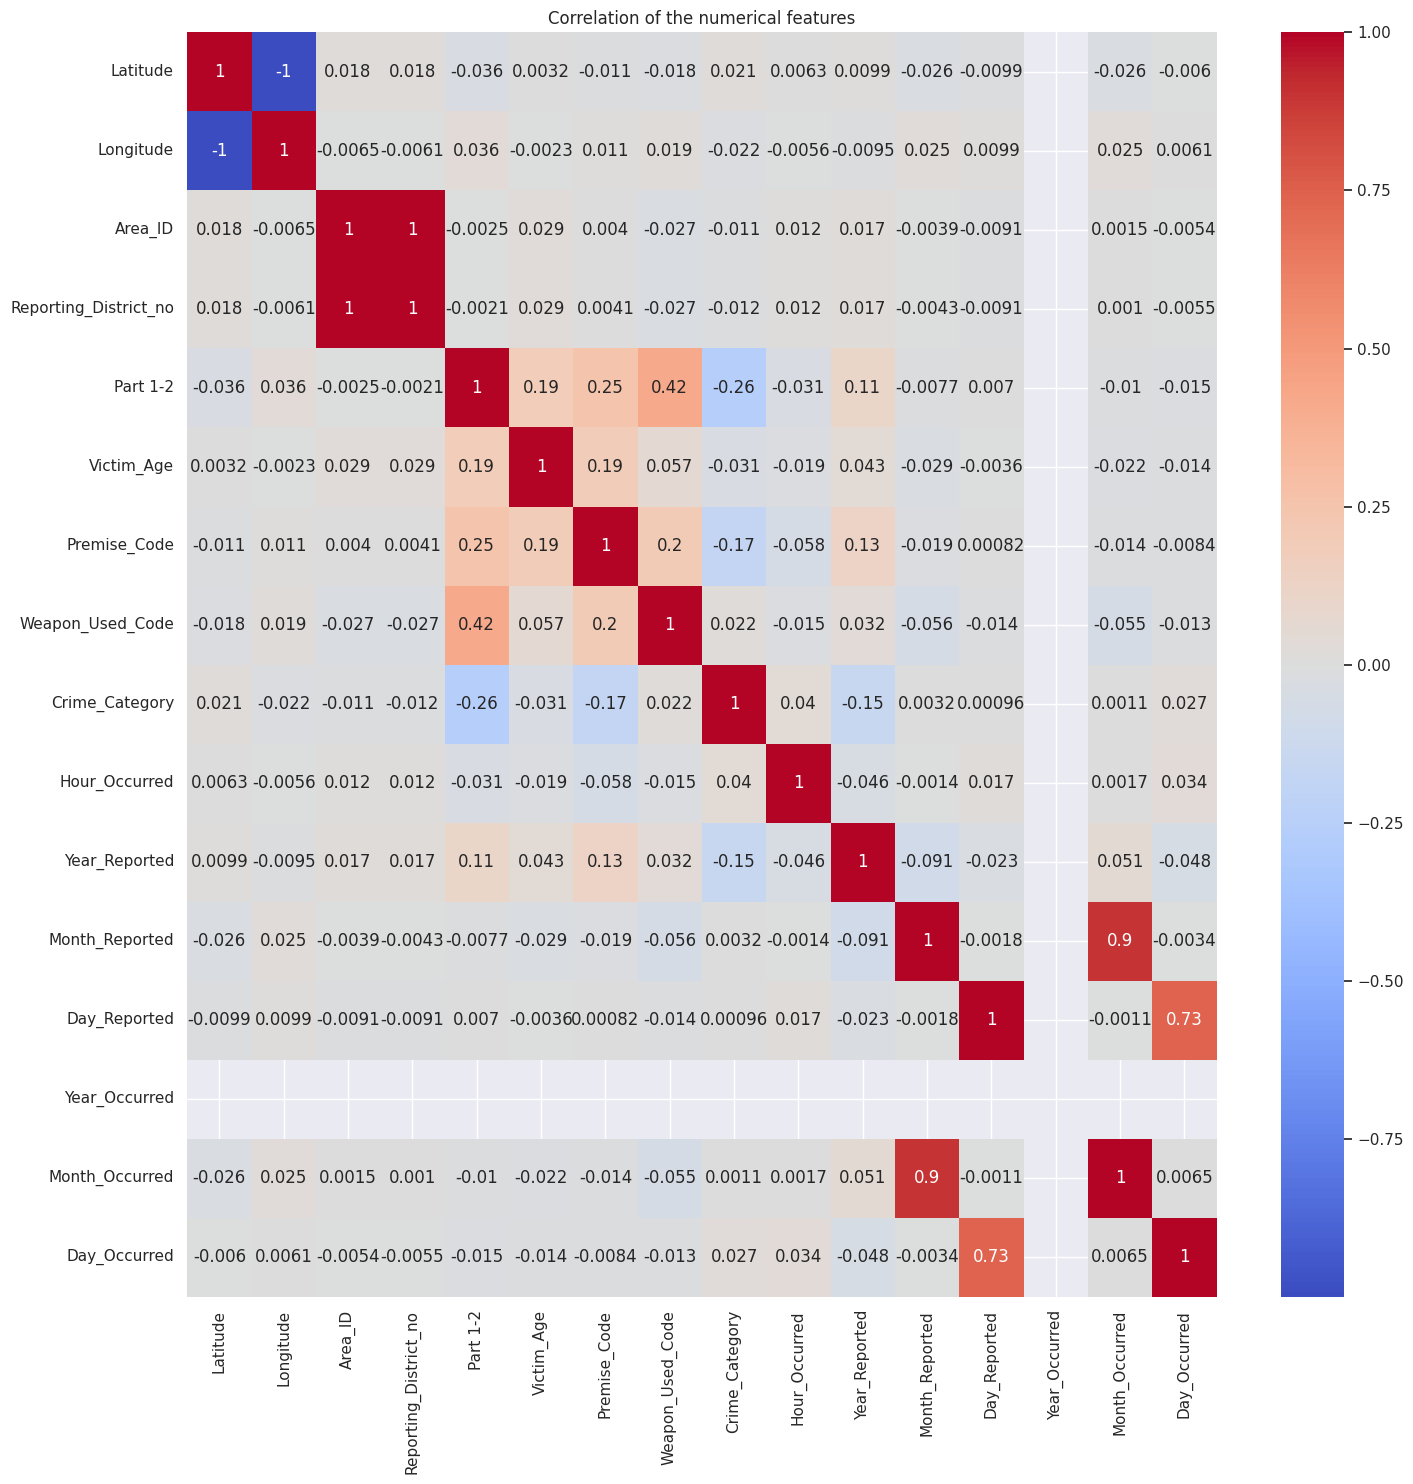

In [26]:
corr2=df_train.corr(numeric_only=True)
plt.figure(figsize=(15,15))
sns.heatmap(corr2,annot=True,cmap='coolwarm')
plt.title('Correlation of the numerical features')
plt.tight_layout()
plt.show()

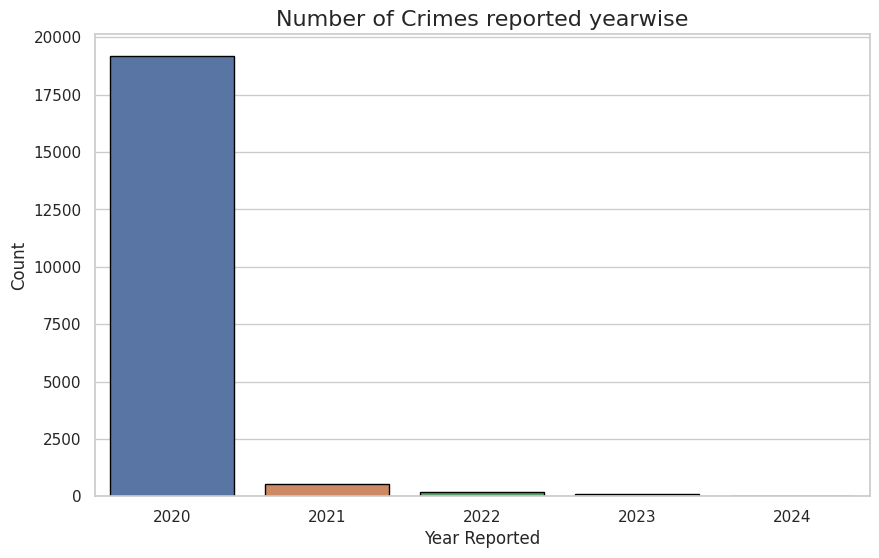

In [27]:
sns.set_style("whitegrid")


plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x="Year_Reported", edgecolor='black')

plt.title("Number of Crimes reported yearwise", fontsize=16)
plt.xlabel("Year Reported", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

#### Insights

`Hour_Occurred`:

Weak positive correlation (0.040), indicating minimal impact on crime category.

`Year_Reported` and `Month_Reported`:

Weak negative correlation (Year_Reported: -0.152), suggesting a slight influence on crime category.

Very weak positive correlation (Month_Reported: 0.003), indicating minimal impact on crime category.

`Day_Reported` and `Day_Occurred`:

Very weak correlations (Day_Reported: 0.001, Day_Occurred: 0.027), indicating minimal impact on crime category.

* From the above correlation plot `Hour_Occurred`,`Month_Reported`, `Day_Reported`,`Month_Occurred`, `Day_Occurred` show 0 or very weak correlation with `Crime_Category` so we can drop these features

In [28]:
df_train.drop(columns=['Hour_Occurred','Month_Reported', 'Day_Reported', 'Year_Occurred',
       'Month_Occurred', 'Day_Occurred'],inplace=True)
df_test.drop(columns=['Hour_Occurred','Month_Reported', 'Day_Reported', 'Year_Occurred',
       'Month_Occurred', 'Day_Occurred'],inplace=True)

### `Area_ID` and `Area_Name`

In [29]:
print("Area Id:",df_train['Area_ID'].nunique())
print("Area Id:",df_train['Area_Name'].nunique())
#Checking if the columns are redundant
df_train[df_train['Area_ID']==15.0]['Area_Name']

Area Id: 21
Area Id: 21


0        N Hollywood
44       N Hollywood
55       N Hollywood
92       N Hollywood
121      N Hollywood
            ...     
19873    N Hollywood
19907    N Hollywood
19916    N Hollywood
19975    N Hollywood
19990    N Hollywood
Name: Area_Name, Length: 1065, dtype: object

In [30]:
df_train['Area_Name'].value_counts()/len(df_train)*100

Area_Name
77th Street    6.725
Pacific        5.785
Central        5.780
Southwest      5.650
Southeast      5.335
N Hollywood    5.325
Hollywood      5.070
Newton         4.995
Olympic        4.800
Wilshire       4.715
Rampart        4.655
West LA        4.550
Van Nuys       4.510
Harbor         4.360
Mission        4.350
Northeast      4.195
Topanga        3.960
West Valley    3.950
Devonshire     3.845
Hollenbeck     3.775
Foothill       3.670
Name: count, dtype: float64

#### Insights

from above analysis we observe `Area_ID` and `Area_Name` are redundant features and show weak correlation so we can drop one of the feature 

### `Reporting_District_no` and `Part 1-2` features

In [31]:
print("Number of Unique values in Reporting district:",df_train["Reporting_District_no"].nunique())
print("Number of Unique values in Part 1-2:",df_train["Part 1-2"].nunique())
print("Checking the percentage of values in each part ",df_train["Part 1-2"].value_counts()/len(df_train)*100)

Number of Unique values in Reporting district: 1120
Number of Unique values in Part 1-2: 2
Checking the percentage of values in each part  Part 1-2
1.0    58.185
2.0    41.815
Name: count, dtype: float64


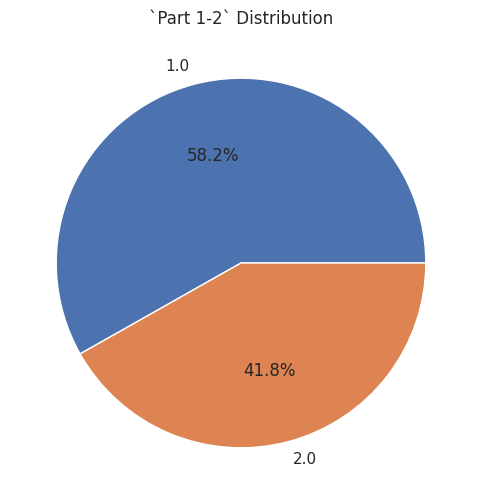

In [32]:
train_part=[k for k in dict(df_train['Part 1-2'].value_counts().items()).keys()]
train_part_count=[i for i in dict(df_train['Part 1-2'].value_counts().items()).values()]

sns.set(style='darkgrid')


plt.figure(figsize=(6,6))
plt.pie(train_part_count,
        labels=train_part,
        autopct='%1.1f%%'
       )
plt.title('`Part 1-2` Distribution')
plt.show()

#### Insights

`Reporting_District_no`
* Number of Unique Values: 1120
* This high number of unique values indicates a large variety of reporting districts, suggesting that the dataset covers a wide geographical area or multiple jurisdictions.
`Part 1-2`
* Number of Unique Values: 2
* The Part 1-2 column has only two unique values, representing a binary classification.
* Percentage of Values in Each Part:
* 1.0: 58.185%
* 2.0: 41.815%
* This distribution shows that there are more instances of Part 1 crimes (58.185%) compared to Part 2 crimes (41.815%).




### `Modus_Operandi`feature

In [33]:
print("Unique Values in Modus_Operandi:",df_train['Modus_Operandi'].nunique())

Unique Values in Modus_Operandi: 10489


#### Insights

`Modus_Operandi`
Number of Unique Values: 10,489
Insights:
* The high number of unique values indicates diverse methods in criminal activities.
* Multiple numbers in each cell suggest crimes often involve more than one tactic.


### `Victim_Sex` and `Victim_Descent` features

In [34]:
print("Unique values in Victim_Sex:",df_train['Victim_Sex'].unique())
print("Understanding the percentages of each type of values",df_train['Victim_Sex'].value_counts()/len(df_train)*100)

Unique values in Victim_Sex: ['M' 'X' 'F' nan 'H']
Understanding the percentages of each type of values Victim_Sex
M    42.69
F    35.88
X     8.30
H     0.01
Name: count, dtype: float64


In [35]:
print("Unique values in Victim_Descent:",df_train['Victim_Sex'].unique())
print("Understanding the percentages of each type of values",df_train['Victim_Sex'].value_counts()/len(df_train)*100)

Unique values in Victim_Descent: ['M' 'X' 'F' nan 'H']
Understanding the percentages of each type of values Victim_Sex
M    42.69
F    35.88
X     8.30
H     0.01
Name: count, dtype: float64


#### Insights

`Victim_Sex`
* The majority of victims are identified as Male or Female, with a significant percentage recorded as Unknown/Other.
* The percentage of H is minimal.
* Missing data in the `Victim_Sex` column indicates the need for data imputation or further investigation.
`Victim_Descent`


### `Premise_Code` and `Premise_Description` features

In [36]:
print("Unique values in Premise_Code",df_train['Premise_Code'].nunique())
print("Unique values in Premise_description:",df_train['Premise_Description'].nunique())
#Checking redundancy of columns by value matching
df_train[df_train['Premise_Code']==519.0]['Premise_Description']

Unique values in Premise_Code 217
Unique values in Premise_description: 216


55       SHORT-TERM VACATION RENTAL
2527     SHORT-TERM VACATION RENTAL
14105    SHORT-TERM VACATION RENTAL
17895    SHORT-TERM VACATION RENTAL
19712    SHORT-TERM VACATION RENTAL
Name: Premise_Description, dtype: object

#### Insights

* The Premise_Code and Premise_Description columns show a high degree of redundancy, as each code directly maps to a specific description. Both columns provide essentially the same information 
* Removing one of these columns can help reduce data complexity and improve model performance by eliminating redundant features.

### `Weapon_Used_Code` and `Weapon_Description` Features

In [37]:
print("Unique values in Weapon_Used_Code",df_train['Weapon_Used_Code'].nunique())
print("Unique values in Weapon_description:",df_train['Weapon_Description'].nunique())
#Checking redundancy of columns by value matching
df_train[df_train['Weapon_Used_Code']==400.0]['Weapon_Description']

Unique values in Weapon_Used_Code 57
Unique values in Weapon_description: 57


1        STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
4        STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
5        STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
19       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
31       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
                              ...                      
19978    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
19981    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
19982    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
19984    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
19995    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
Name: Weapon_Description, Length: 3990, dtype: object

#### Insights

* Both feature `Weapon_Used_Code` and `Weapon_Description` have the same number of unique values, indicating a direct one-to-one correspondence between the codes and their descriptions.
* Given the substantial amount of missing data in both columns, it is crucial to consider strategies to address these gaps, such as imputation.

### `Status` and `Status_Description`features

In [38]:
print("Unique values in Status",df_train['Status'].nunique())
print("Unique values in Status_description:",df_train['Status_Description'].nunique())
#Checking redundancy of columns by value matching
df_train[df_train['Status']=='IC']['Status_Description']

Unique values in Status 5
Unique values in Status_description: 5


0        Invest Cont
1        Invest Cont
2        Invest Cont
3        Invest Cont
4        Invest Cont
            ...     
19995    Invest Cont
19996    Invest Cont
19997    Invest Cont
19998    Invest Cont
19999    Invest Cont
Name: Status_Description, Length: 15236, dtype: object

#### Insights

* Both Status and Status_Description columns have 5 unique values.
* The Status and Status_Description columns may be redundant. If Status_Description consistently shows a single status, it is likely unnecessary to retain both columns.
* Retaining only the one that is most meaningful and informative based on our specific analysis or modeling needs.

## Multivariate Analysis

In [39]:
df_train['Crime_Category']=label_enc.inverse_transform(df_train['Crime_Category']) 

### Scenario 1:Understaning the distribution of `Crime_Category` against different Victim gender's. 

In [40]:
df_train.groupby("Victim_Sex")['Crime_Category'].value_counts(normalize=True).to_frame()*100

proportion
Victim_Sex Crime_Category                           
F          Property Crimes                 42.028986
           Violent Crimes                  34.378484
           Crimes against Public Order     12.374582
           Fraud and White-Collar Crimes    8.681717
           Crimes against Persons           1.853400
           Other Crimes                     0.682832
H          Fraud and White-Collar Crimes   50.000000
           Property Crimes                 50.000000
M          Property Crimes                 55.293980
           Violent Crimes                  26.305926
           Crimes against Public Order      8.995081
           Fraud and White-Collar Crimes    7.355353
           Crimes against Persons           1.065823
           Other Crimes                     0.983837
X          Property Crimes                 80.662651
           Crimes against Public Order      9.156627
           Fraud and White-Collar Crimes    4.156627
           Violent Crimes                   3.192771
           Other Crimes                     2.771084
           Crimes against Persons           0.060241

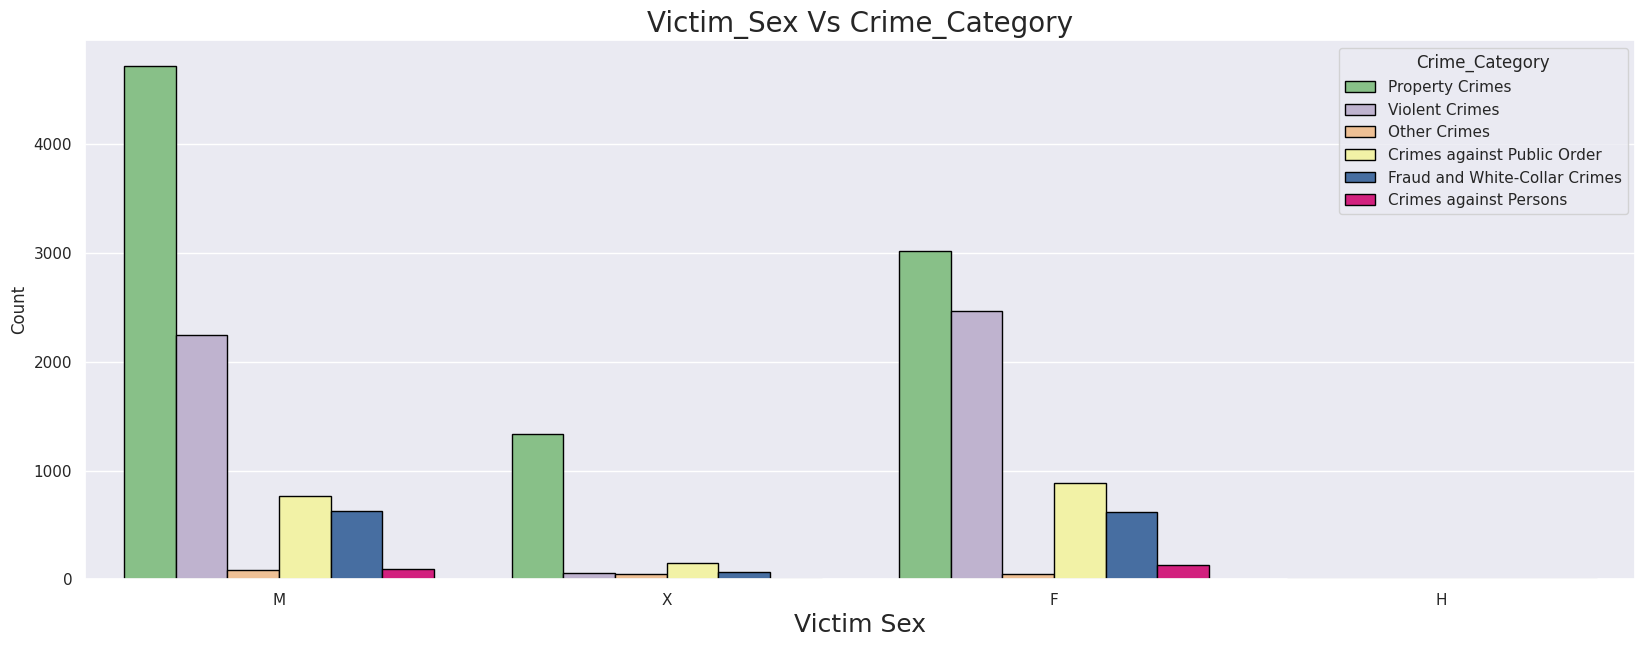

In [41]:
plt.subplots(figsize=(20,7))
sns.countplot(x="Victim_Sex", hue="Crime_Category", data=df_train, ec="black", palette="Accent")

plt.title("Victim_Sex Vs Crime_Category", fontsize=20)
plt.ylabel("Count",fontsize=12)

plt.xlabel("Victim Sex", fontsize=18)
plt.legend(title="Crime_Category", fancybox=True)

plt.show()

#### Insights

* Property Crimes dominate across all gender categories, with the highest proportion for the X category.
* Female victims are most frequently involved in Property Crimes and Violent Crimes, while their involvement in Crimes against Persons is minimal.
* Male victims also show a high proportion in Property Crimes and Violent Crimes, with lower involvement in Crimes against Persons.
* The H category has an even split between Property and Fraud Crimes.
* The X category is predominantly associated with Property Crimes and shows very low involvement in other crime types.

### Scenario 2: Understanding the proportion of different crime categories within various arrest and investigation statuses

In [42]:
df_train.groupby("Status_Description")['Crime_Category'].value_counts(normalize=True).to_frame()*100

proportion
Status_Description Crime_Category                           
Adult Arrest       Violent Crimes                  40.798442
                   Property Crimes                 36.660175
                   Crimes against Public Order     15.725414
                   Crimes against Persons           3.359299
                   Fraud and White-Collar Crimes    1.850049
                   Other Crimes                     1.606621
Adult Other        Violent Crimes                  55.333077
                   Property Crimes                 21.178283
                   Crimes against Public Order     17.905275
                   Crimes against Persons           3.080477
                   Fraud and White-Collar Crimes    1.424721
                   Other Crimes                     1.078167
Invest Cont        Property Crimes                 67.734313
                   Violent Crimes                  15.981885
                   Fraud and White-Collar Crimes    8.394592
                   Crimes against Public Order      6.635600
                   Other Crimes                     0.767918
                   Crimes against Persons           0.485692
Juv Arrest         Property Crimes                 50.000000
                   Violent Crimes                  38.571429
                   Crimes against Public Order      8.571429
                   Crimes against Persons           1.428571
                   Other Crimes                     1.428571
Juv Other          Violent Crimes                  69.767442
                   Property Crimes                 18.604651
                   Crimes against Public Order      6.976744
                   Crimes against Persons           2.325581
                   Fraud and White-Collar Crimes    2.325581

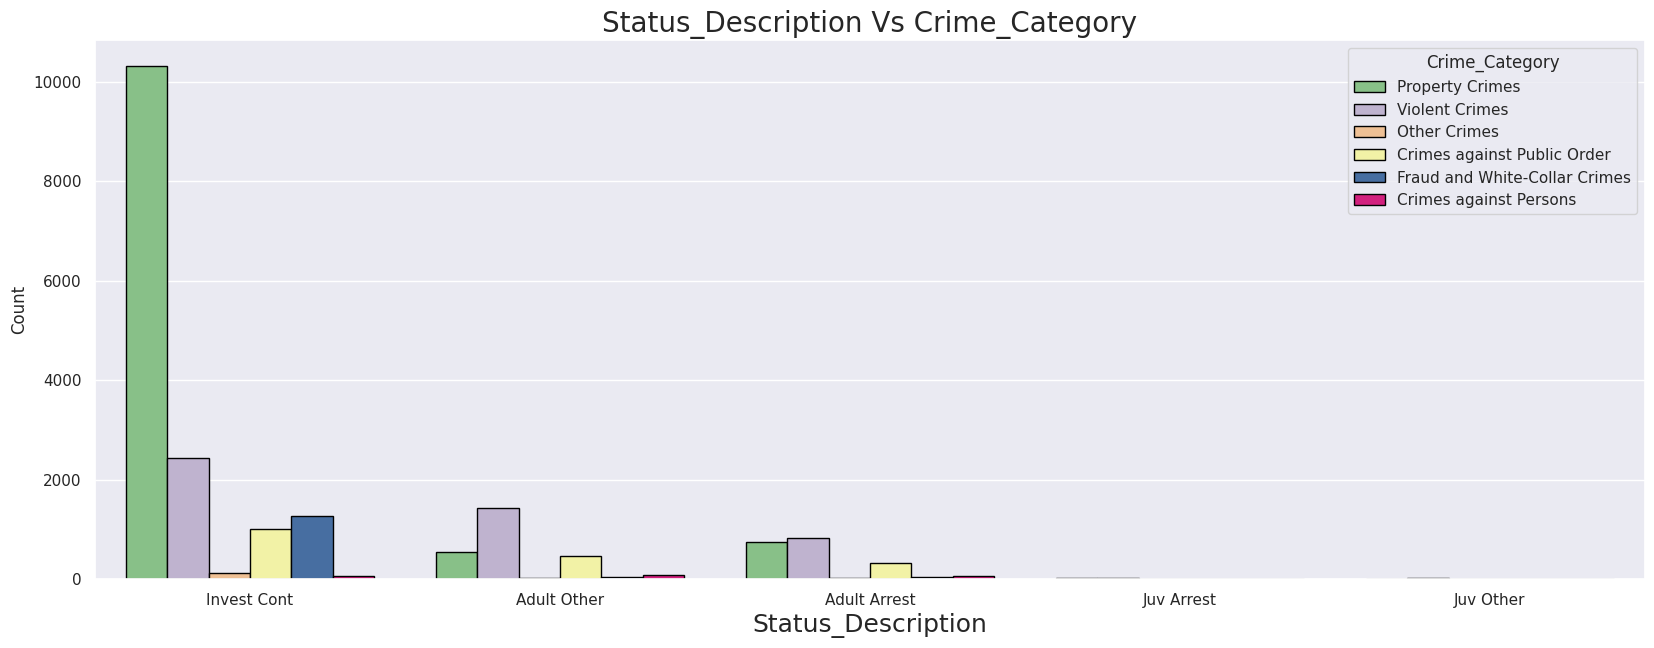

In [43]:
plt.subplots(figsize=(20,7))
sns.countplot(x="Status_Description", hue="Crime_Category", data=df_train, ec="black", palette="Accent")

plt.title("Status_Description Vs Crime_Category", fontsize=20)
plt.ylabel("Count",fontsize=12)

plt.xlabel("Status_Description", fontsize=18)
plt.legend(title="Crime_Category", fancybox=True)

plt.show()

#### Insights

* Property crimes are the most prevalent crime category across all status descriptions.
* Violent crimes constitute a significant portion, particularly in Adult Arrest and Juvenile Arrest cases.
* Arrest statuses exhibit distinct crime category profiles:
* Adult Arrests: Higher proportion of violent crimes.
* Adult Others: Lower property crime rates, with a relatively higher percentage of crimes against public order.
 * Invest Cont: Dominated by property crimes, with a lower incidence of violent crimes.
 * Juvenile Arrests: Similar to Adult Arrests, with a higher proportion of violent crimes.
 * Juvenile Others: Resembles Adult Others, with lower property crime rates and a higher percentage of violent crimes.
* Juvenile cases primarily involve property and violent crimes.

## Splitting the Dataset 

In [44]:
X=df_train.drop(columns=["Crime_Category"])
y=df_train["Crime_Category"]

## Dropping the non-important Features identified using EDA

In [45]:
X.drop(columns=["Cross_Street","Area_Name","Premise_Code","Weapon_Description","Status_Description"],inplace = True)
df_test.drop(columns=["Cross_Street","Area_Name","Premise_Code","Weapon_Description","Status_Description"],inplace = True)



#### Insights

`Cross_Street`:A high percentage of missing values in this columns affects its reliability and makes the feature less useful.
`Area_Name`,`Premise_Description`,`Weapon_Description`,`Status_Description`::The information contained within these column is captured by other feature `Area_ID`,`Premise_Code`,`Weapon_Used_Code`,`Status` ,making them not contribute any new information and making them column redundant.



## Handling Null Values
<a name='null-values-treatment'></a>

## Imputation

In [46]:
X.isna().sum()

Location                     0
Latitude                     0
Longitude                    0
Area_ID                      0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Description          5
Weapon_Used_Code         12665
Status                       0
Year_Reported                0
dtype: int64

In [47]:
X_cols=X.columns
test_cols=df_test.columns

In [48]:
SI=SimpleImputer(strategy="most_frequent")
X=SI.fit_transform(X)
df_test=SI.transform(df_test)  
X=pd.DataFrame(X,columns=X_cols)
df_test=pd.DataFrame(df_test,columns=test_cols)

#### Insight

All the features with missing values are Categorical Features so we can use a Simple Imputer for Imputation with most frequent as strategy  in these columns.

## Splitting the DataSet
<a name='train-test-split'></a>

In [49]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0)

## Data Preprocessing
<a name='preprocessing'></a>

In [50]:

num_cols=['Latitude','Longitude','Victim_Age']
cat_cols=['Area_ID','Reporting_District_no','Part 1-2','Victim_Sex' ,'Victim_Descent','Weapon_Used_Code','Status','Year_Reported']
text_cols=['Location','Modus_Operandi','Premise_Description']

In [51]:
preprocessor=ColumnTransformer([
                                      ('num_ss',StandardScaler(),num_cols),
                                      ('cat_ohe',OneHotEncoder(handle_unknown="ignore"),cat_cols),
                                      ('txt_tfid1',TfidfVectorizer(),'Location'),
                                      ('txt_tfid2',TfidfVectorizer(),'Modus_Operandi'),
                                      ('txt_tfid3',TfidfVectorizer(),'Premise_Description')
                                    ])

In [52]:
X_train_preprocessed=preprocessor.fit_transform(X_train,y_train)
X_val_preprocessed=preprocessor.transform(X_val)

#### Insights

#### Column Transformer Pipeline

`ColumnTransformer` pipeline to preprocess a dataset applies different transformations to different columns based on their data types:

* **Numerical Columns (num_cols):** Standardized using `StandardScaler` to ensure features have zero mean and unit variance.
* **Categorical Columns (cat_cols):** Encoded using `OneHotEncoder` to convert categorical values into numerical representations. The `handle_unknown="ignore"` parameter handles unseen categories during prediction.
* **Textual Columns (Location, Modus_Operandi, Premise_Description):** Transformed into numerical representations using `TfidfVectorizer`. TF-IDF (Term Frequency-Inverse Document Frequency) is a common technique for text feature extraction in natural language processing.

**Key Points:**

* This pipeline effectively handles different data types within a single transformation step.
* Standardization of numerical columns is crucial for many machine learning algorithms.
* One-hot encoding is suitable for categorical features with a limited number of distinct values.
* TF-IDF vectorization is appropriate for text data, capturing word importance and frequency information.

By applying this `ColumnTransformer`, the dataset is prepared for model training, ensuring consistent data formats and potentially improving model performance.




## Feature Engineering
<a name='feature-engineering'></a>

### PCA for Dimensionality Reduction

In [53]:
#redefined the column_transformer here as for pca we need sparse_threshhold 0 i.e why seprate transformer
column_transformer_pca=ColumnTransformer([
                                      ('num_ss',StandardScaler(),num_cols),
                                      ('cat_ohe',OneHotEncoder(handle_unknown="ignore"),cat_cols),
                                      ('txt_tfid1',TfidfVectorizer(),'Location'),
                                      ('txt_tfid2',TfidfVectorizer(),'Modus_Operandi'),
                                      ('txt_tfid3',TfidfVectorizer(),'Premise_Description')
                                    ],sparse_threshold=0)
pca_pipeline=Pipeline([
                       ("transform",column_transformer_pca),
                       ("pca",PCA(n_components=100)) 
      
                      ])

In [54]:
X_train_preprocessed_pca=pca_pipeline.fit_transform(X_train,y_train)
X_val_preprocessed_pca=pca_pipeline.transform(X_val)

#### Insights

* The `sparse_threshold` parameter in ColumnTransformer controls the density of the output matrix.
* Setting sparse_threshold=0 ensures that the output of the ColumnTransformer is always a dense NumPy array, regardless of the sparsity of the input data.
* PCA can operate efficiently without dealing with sparse matrices but it can also increase memory consumption.
* using alternative dimensionality reduction techniques like `Truncated SVD`, which are designed for sparse data.


### Applying LGBMClassifier with preprocessed features

In [55]:
model=LGBMClassifier()
model.fit(X_train_preprocessed_pca,y_train)
score_lg_pca=model.score(X_val_preprocessed_pca,y_val)
print("LGBM Classifier after PCA Score=",score_lg_pca)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 100
[LightGBM] [Info] Start training from score -4.465408
[LightGBM] [Info] Start training from score -2.391416
[LightGBM] [Info] Start training from score -2.694702
[LightGBM] [Info] Start training from score -4.731584
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
LGBM Classifier after PCA Score= 0.912


#### Insights
### Model Comparison: LGBM Classifier vs. LGBM Classifier after applying PCA 

**Key Observation:**
* The LightGBM classifier achieved an accuracy of 0.94925 without any feature engineering.
* After applying PCA and preprocessing techniques, the accuracy dropped to 0.9125.

**Potential Reasons for Decreased Accuracy:**

* **Information Loss:** PCA, as a dimensionality reduction technique, can potentially lead to information loss. By reducing the feature space, crucial information for prediction might be discarded.
* **Preprocessing Impact:** The applied preprocessing techniques might not be optimal for the dataset or the model.
* **Data Leakage:** There could be potential data leakage during the preprocessing or feature engineering steps, affecting the model's generalization ability.



### KBest for feature Selection

In [56]:
label_enc=LabelEncoder()
y_train_enc=label_enc.fit_transform(y_train)
y_val_enc=label_enc.transform(y_val)

In [57]:
K_best_pipeline=Pipeline([
                          ("coltransformer",preprocessor),
                          ("k_best",SelectKBest(f_regression, k=700)),
                          ('mdlxg',XGBClassifier()) 
                        ])
K_best_pipeline.fit(X_train,y_train_enc)
score_xg_knn=K_best_pipeline.score(X_val,y_val_enc)
print("Accuracy of XGBClassifier after KNN=",score_xg_knn)    

Accuracy of XGBClassifier after KNN= 0.95125


* K Input  --->  Accuracy
* 270      ---->.947
* 500      ----->.947
* 700      ----->.949


In [58]:
K_best_pipeline=Pipeline([
                          ("coltransformer",preprocessor),
                          ("k_best",SelectKBest(f_regression, k=700)),
                          ('lgb',LGBMClassifier()) 
])
K_best_pipeline.fit(X_train,y_train_enc)
score_lg_knn=K_best_pipeline.score(X_val,y_val_enc)
print("Accuracy of LGBM Classifier  after KNN=",score_lg_knn) 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9919
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 256
[LightGBM] [Info] Start training from score -4.465408
[LightGBM] [Info] Start training from score -2.391416
[LightGBM] [Info] Start training from score -2.694702
[LightGBM] [Info] Start training from score -4.731584
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
Accuracy of LGBM Classifier  after KNN= 0.94925


In [59]:
m3=LGBMClassifier()
m3.fit(X_train_preprocessed,y_train)
m3.score(X_val_preprocessed,y_val)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12137
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 741
[LightGBM] [Info] Start training from score -4.465408
[LightGBM] [Info] Start training from score -2.391416
[LightGBM] [Info] Start training from score -2.694702
[LightGBM] [Info] Start training from score -4.731584
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516


0.94925

#### Insights



## Hyperparameter Tuning

### LR Tuning

In [60]:
# param_grid_LR={
#                "penalty":['l1','l2'],
#                "C": [10,1, 0.1] ,
#                "solver": ['saga','liblinear']
# }
# grid_LR=GridSearchCV(LogisticRegression(),param_grid=param_grid_LR,cv=2,verbose=3,n_jobs=-1)
# grid_LR.fit(X_train_kbest,y_train_enc)


In [61]:
# grid_LR.best_params_

#### Insights
* score=0.939
* Best Parameters on using GridSearchCv Logistic regression
* 'C': 1, 'penalty': 'l1', 'solver': 'liblinear'


### XGBoost Tuning

In [62]:
k=SelectKBest(f_regression ,k=700)
X_train_kbest=k.fit_transform(X_train_preprocessed,y_train_enc)
X_val_kbest=k.transform(X_val_preprocessed)

In [63]:
# param_grid_xg={
#            "learning_rate":[0.1,0.3,0.5,1],
#            "max-depth":[10,12,15,8],
#            "lambda"  :[1,5,10,15]
    
#               }
# grid_xgb=GridSearchCV(XGBClassifier(),param_grid=param_grid_xg,cv=2,verbose=3,njobs=-1)
# grid_xgb.fit(X_train_kbest,y_train_enc)


In [64]:
# grid_xgb.best_params_

#### Insights

* Best Parameters for XGBoost HPT:
* {'lambda': 1, 'learning_rate': 0.3, 'max-depth': 10}
* Accuracy=.949

### Random Forest Tuning

In [65]:
# param_grid_RF = {
#     'n_estimators': [120,80,140],
#     'max_depth': [None,3,5],
#     'min_samples_split': [3,1,5],
#     'criterion': ['gini','entropy'],
#     'max_features': ['sqrt']
# }

# grid_RF=GridSearchCV(RandomForestClassifier(),param_grid=param_grid_RF,cv=2,verbose=3,n_jobs=-1)
# grid_RF.fit(X_train_kbest,y_train_enc)

In [66]:
# grid_RF.best_params_

k=700
* Score:0.943
* Best params for Random forest 
* 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 3,
* 'n_estimators': 140


## Final Model

In [67]:

# encoded_label = xgb_classifier.predict(finall_test)
# label_decoding = label_encoder_y.inverse_transform(encoded_label)
# # Create submission dataframe range(1, len(labb) + 1)
# submission_df = pd.DataFrame({'ID': range(1, 5000 + 1), 'Crime_Category': label_decoding})

# # Save submission dataframe to a CSV file
# submission_df.to_csv('submission.csv', index=False)

In [68]:
# X_train_f = select_pipe.fit_transform(X, y_encoded)
# X_final_test = select_pipe.transform(X_test)

# final_model = XGBClassifier(learning_rate=0.3, max_depth=10)
# final_model.fit(X_final_train, y_encoded)
# y_pred_label_encd3 = label_encoder3.inverse_transform(final_model.predict(X_final_test))

# # Submission
# submission = pd.DataFrame(columns=['ID', 'Crime Category'])
# submission['ID'] = [i for i in range(1, len(y_pred) + 1)]
# submission['Crime Category'] = y_pred_final
# submission.to_csv('submission.csv', index=False)

## Model Training and Evaluation

### Model1:Logistic Regression

In [69]:
m1=LogisticRegression()
m1.fit(X_train_preprocessed,y_train)
score_lr_default=m1.score(X_val_preprocessed,y_val)
y_pred1=m1.predict(X_val_preprocessed)
print("Score of LR with default parameters",score_lr_default)
#Classification report of Logistic Regression Classifier
report1=classification_report(y_val,y_pred1)
print(report1)

Score of LR with default parameters 0.93625
                               precision    recall  f1-score   support

       Crimes against Persons       0.75      0.51      0.61        41
  Crimes against Public Order       0.82      0.81      0.81       344
Fraud and White-Collar Crimes       0.92      0.93      0.93       274
                 Other Crimes       0.79      0.29      0.42        38
              Property Crimes       0.98      0.97      0.98      2386
               Violent Crimes       0.88      0.95      0.91       917

                     accuracy                           0.94      4000
                    macro avg       0.86      0.74      0.78      4000
                 weighted avg       0.94      0.94      0.93      4000



In [70]:
#Confussion Matrix
c_mat1 = confusion_matrix(y_val,y_pred1)
print(ConfusionMatrixDisplay(c_mat1))

### Model2:XGBoost

In [71]:
Label_encoder=LabelEncoder()
y_train_enc=Label_encoder.fit_transform(y_train)
y_val_enc=Label_encoder.transform(y_val)

In [72]:
m2=XGBClassifier()
m2.fit(X_train_preprocessed,y_train_enc)
y_pred2=m2.predict(X_val_preprocessed)
score_xg_default=m2.score(X_val_preprocessed,y_val_enc)
print("Score of XGBoost with default parameters",score_xg_default)
#Classification report of XGBoost Classifier
report2=classification_report(y_val_enc,y_pred2)
print(report2)

Score of XGBoost with default parameters 0.95325
              precision    recall  f1-score   support

           0       0.64      0.56      0.60        41
           1       0.84      0.85      0.84       344
           2       0.95      0.95      0.95       274
           3       0.65      0.34      0.45        38
           4       0.99      0.99      0.99      2386
           5       0.92      0.95      0.93       917

    accuracy                           0.95      4000
   macro avg       0.83      0.77      0.79      4000
weighted avg       0.95      0.95      0.95      4000



In [73]:
#Confussion Matrix
c_mat2 = confusion_matrix(y_val_enc,y_pred2)
print((c_mat2))

[[  23    1    0    0    2   15]
 [   4  291    8    4    3   34]
 [   0   12  259    2    1    0]
 [   0   15    4   13    2    4]
 [   0    7    0    1 2357   21]
 [   9   21    2    0   15  870]]


### Model3:LGBM Classifier LightBoostingMethod Classifier 

In [74]:
m3=LGBMClassifier()
m3.fit(X_train_preprocessed,y_train)
y_pred3=m3.predict(X_val_preprocessed)
score_lg_default=m3.score(X_val_preprocessed,y_val)
print("Score of LGBoost with default parameters",score_lg_default)
#Classification report of LGBM Classifier
report3=classification_report(y_val,y_pred3)
print(report3)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12137
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 741
[LightGBM] [Info] Start training from score -4.465408
[LightGBM] [Info] Start training from score -2.391416
[LightGBM] [Info] Start training from score -2.694702
[LightGBM] [Info] Start training from score -4.731584
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
Score of LGBoost with default parameters 0.94925
                               precision    recall  f1-score   support

       Crimes against Persons       0.57      0.59      0.58        41
  Crimes against Public Order       0.81      0.85      0.83       344
Fraud and White-Collar Crimes       0.93      0.93      0.

In [75]:
#Confussion Matrix
c_mat3 = confusion_matrix(y_val,y_pred3)
print((c_mat3))

[[  24    1    0    0    2   14]
 [   2  294    9    4    4   31]
 [   0   17  255    1    1    0]
 [   0   19    5   10    2    2]
 [   0    6    0    2 2355   23]
 [  16   24    4    0   14  859]]


### Model4: Decision Tree Classifier

In [76]:
m4=DecisionTreeClassifier()
m4.fit(X_train_preprocessed,y_train)
y_pred4=m4.predict(X_val_preprocessed)
score_dt_default=m4.score(X_val_preprocessed,y_val)
print("Score of Decission Tree with default parameters",score_dt_default)
#Classification report of Decision Tree Classifier
report4=classification_report(y_val,y_pred4)
print(report4)


Score of Decission Tree with default parameters 0.9325
                               precision    recall  f1-score   support

       Crimes against Persons       0.50      0.49      0.49        41
  Crimes against Public Order       0.81      0.82      0.81       344
Fraud and White-Collar Crimes       0.93      0.89      0.91       274
                 Other Crimes       0.35      0.32      0.33        38
              Property Crimes       0.98      0.98      0.98      2386
               Violent Crimes       0.90      0.90      0.90       917

                     accuracy                           0.93      4000
                    macro avg       0.74      0.73      0.74      4000
                 weighted avg       0.93      0.93      0.93      4000



In [77]:
#Confussion Matrix
c_mat4 = confusion_matrix(y_val,y_pred4)
print((c_mat4))

[[  20    2    2    1    3   13]
 [   2  281    3   10   11   37]
 [   1   13  244    3    3   10]
 [   3   11    5   12    3    4]
 [   1    6    0    3 2344   32]
 [  13   36    8    5   26  829]]


### Model5:Random Forest

In [78]:
m5=RandomForestClassifier()
m5.fit(X_train_preprocessed,y_train)
y_pred5=m5.predict(X_val_preprocessed)
score_rf_default=m5.score(X_val_preprocessed,y_val)
print("Score of Random Forest with default parameters",score_rf_default)
#Classification report of Random Forest Classifier
report5=classification_report(y_val,y_pred5)
print(report5)


Score of Random Forest with default parameters 0.94
                               precision    recall  f1-score   support

       Crimes against Persons       0.92      0.27      0.42        41
  Crimes against Public Order       0.88      0.75      0.81       344
Fraud and White-Collar Crimes       0.92      0.93      0.92       274
                 Other Crimes       0.71      0.13      0.22        38
              Property Crimes       0.98      0.98      0.98      2386
               Violent Crimes       0.87      0.97      0.92       917

                     accuracy                           0.94      4000
                    macro avg       0.88      0.67      0.71      4000
                 weighted avg       0.94      0.94      0.93      4000



In [79]:
#Confussion Matrix
c_mat5 = confusion_matrix(y_val,y_pred5)
print((c_mat5))

[[  11    2    3    0    2   23]
 [   1  258   12    1   10   62]
 [   0    9  254    1    7    3]
 [   0   11    5    5   14    3]
 [   0    3    0    0 2342   41]
 [   0   10    3    0   14  890]]


## Comparing the Model

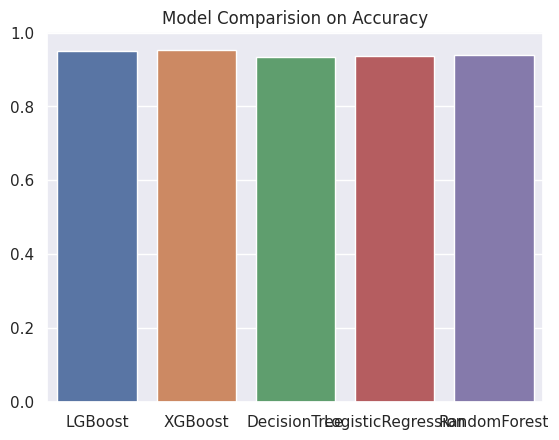

In [80]:
m_name = ['LGBoost',"XGBoost","DecisionTree","LogisticRegression","RandomForest"]
accuracy = [score_lg_default,score_xg_default,score_dt_default,score_lr_default,score_rf_default]
sns.barplot(x=m_name,y=accuracy)
plt.title("Model Comparision on Accuracy")
plt.show()

## Final Model Selection 

In [81]:
X_train_final = preprocessor.fit_transform(X,y)
X_test_final = preprocessor.transform(df_test)

label_encoder_f = LabelEncoder()
y_encoded = label_encoder_f.fit_transform(y)

In [82]:
final_model = XGBClassifier()
final_model.fit(X_train_final,y_encoded)
y_pred_final = label_encoder_f.inverse_transform(final_model.predict(X_test_final))

In [83]:
submission = pd.DataFrame(columns = ["ID","Crime_Category"])
submission["ID"] = [i for i in range(1,len(y_pred_final)+1)]
submission["Crime_Category"] = y_pred_final
submission.to_csv('submission.csv',index=False)

In [84]:
### Model Training
<a name ='model-training'></a>

SyntaxError: invalid syntax (4272976649.py, line 2)

In [ ]:
### Navigation
- [Back to Top](#top)